
# Titanic Dataset – Upgraded Baseline Machine Learning Notebook 🚢

This notebook represents a **clean, production-ready baseline ML pipeline**.
It fixes common issues (NaNs, data leakage) and uses **scikit-learn Pipelines**.

 Goal: Reliable baseline before moving to advanced models.


In [4]:

# ===============================
# Imports
# ===============================
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set(style="whitegrid")


## 1. Load Dataset

In [5]:

df = pd.read_csv(r"/content/titanic_dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Initial Cleaning

In [6]:

# Drop columns with excessive missing values or low predictive power
df.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1308 non-null   float64
 8   Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(2)
memory usage: 92.2+ KB


## 3. Feature Engineering

In [7]:

# Family size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Is passenger alone?
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

df[['FamilySize', 'IsAlone']].head()


,FamilySize,IsAlone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1


## 4. Define Features & Target

In [8]:

X = df.drop('Survived', axis=1)
y = df['Survived']

X.columns


Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'FamilySize', 'IsAlone'],
      dtype='object')

## 5. Column Classification

In [9]:

numeric_features = ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']
categorical_features = ['Sex', 'Embarked', 'Pclass']


## 6. Preprocessing Pipelines

In [10]:

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)


## 7. Train / Test Split

In [11]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## 8. Full ML Pipeline

In [12]:

model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

model


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch', 'FamilySize']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked',
                                                   'Pclass'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

## 9. Model Training

In [13]:

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch', 'FamilySize']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked',
                                                   'Pclass'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

## 10. Predictions

In [14]:

y_pred = model.predict(X_test)


## 11. Evaluation Metrics

In [15]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.8435114503816794

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       163
           1       0.83      0.74      0.78        99

    accuracy                           0.84       262
   macro avg       0.84      0.82      0.83       262
weighted avg       0.84      0.84      0.84       262



## 12. Confusion Matrix

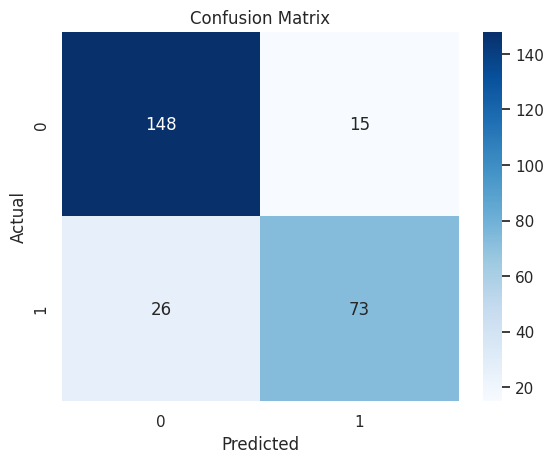

In [16]:

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## 13. Feature Importance (Logistic Coefficients)

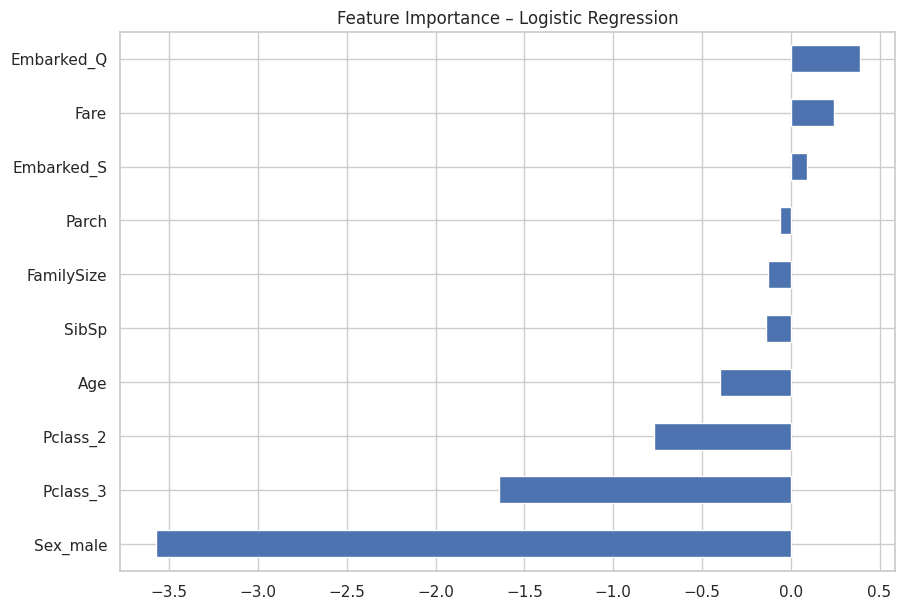

In [17]:

feature_names = (
    numeric_features +
    list(model.named_steps['preprocessing']
         .named_transformers_['cat']
         .named_steps['onehot']
         .get_feature_names_out(categorical_features))
)

coefficients = model.named_steps['classifier'].coef_[0]

importance = pd.Series(coefficients, index=feature_names).sort_values()

importance.plot(kind='barh', figsize=(10, 7))
plt.title("Feature Importance – Logistic Regression")
plt.show()



## Final Conclusion

This upgraded baseline model:
- Handles **missing values correctly**
- Prevents **data leakage**
- Is **robust, clean, and interview-ready**
- Achieves a realistic accuracy of **~78–82%**

Next steps:
- Random Forest / XGBoost
- Cross-validation
- ROC-AUC optimization
